<a href="https://colab.research.google.com/github/AlxManAi/Data-Processing-Project/blob/main/Data_Processing_L11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Загрузка библиотек

In [3]:
import pandas as pd  # для работы с данными
import numpy as np  # для числовых операций
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для построения графиков

# Настройки для графиков
sns.set(style="whitegrid")

# 2. Объединение файлов и просмотр заголовков

In [4]:
# Загрузка данных
doc_views = pd.read_csv('/content/doc_views.csv')
payments_data = pd.ExcelFile('/content/case_data.xlsx').parse('Payments')

# Объединение файлов по общему ключу (например, user_id)
combined_data = pd.merge(doc_views, payments_data, how='inner', on='user_id')

# Проверка уникальности названий столбцов
duplicate_columns = combined_data.columns[combined_data.columns.duplicated()].unique()

if len(duplicate_columns) > 0:
    print(f"Найдены дублирующиеся названия столбцов: {duplicate_columns.tolist()}")

    for col in duplicate_columns:
        # Найти все дублирующиеся столбцы с одинаковым названием
        duplicate_cols_indices = [i for i, c in enumerate(combined_data.columns) if c == col]

        # Переименование столбцов с добавлением индекса
        for idx, col_index in enumerate(duplicate_cols_indices):
            if idx > 0:  # Начинаем переименование с первого дубликата
                new_col_name = f"{col}_{idx}"
                combined_data.columns.values[col_index] = new_col_name
                print(f"Столбец '{col}' переименован в '{new_col_name}'.")
else:
    print("Дублирующихся названий столбцов не найдено.")

# Вывод итоговых названий столбцов после обработки
print("\nИтоговые названия столбцов:")
print(combined_data.columns.tolist())


Дублирующихся названий столбцов не найдено.

Итоговые названия столбцов:
['document_id', 'user_id', 'viewed_at', 'document_title', 'course_name', 'university_name', 'category_id', 'category_name', 'premium', 'rating', 'pages', 'word_count', 'ID', 'Name', 'Last Name', 'Passport Number', 'id', 'created_at', 'amount', 'brand_code', 'shopper_locale', 'currency', 'event_code', 'is_trial', 'trial_days']


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Переименование полей по стандарту (в нижний регистр)

In [6]:
# Переименование столбцов по стандарту CamelCase
def to_camel_case(column_name):
    parts = column_name.lower().split('_')
    return parts[0] + ''.join(word.capitalize() for word in parts[1:])

combined_data.columns = [to_camel_case(col) for col in combined_data.columns]

# Проверка уникальности названий столбцов
duplicate_columns = combined_data.columns[combined_data.columns.duplicated()].unique()

if len(duplicate_columns) > 0:
    print(f"Найдены дублирующиеся названия столбцов после переименования: {duplicate_columns.tolist()}")

    for col in duplicate_columns:
        # Найти все дублирующиеся столбцы с одинаковым названием
        duplicate_cols_indices = [i for i, c in enumerate(combined_data.columns) if c == col]

        # Переименование столбцов с добавлением индекса для уникальности
        for idx, col_index in enumerate(duplicate_cols_indices):
            if idx > 0:  # Начинаем переименование с первого дубликата
                new_col_name = f"{col}_{idx}"
                combined_data.columns.values[col_index] = new_col_name
                print(f"Столбец '{col}' переименован в '{new_col_name}'.")
else:
    print("Дублирующихся названий столбцов не найдено.")

# Вывод итоговых названий столбцов после обработки
print("\nИтоговые названия столбцов:")
print(combined_data.columns.tolist())


Найдены дублирующиеся названия столбцов после переименования: ['id']
Столбец 'id' переименован в 'id_1'.

Итоговые названия столбцов:
['documentId', 'userId', 'viewedAt', 'documentTitle', 'courseName', 'universityName', 'categoryId', 'categoryName', 'premium', 'rating', 'pages', 'wordCount', 'id', 'name', 'last name', 'passport number', 'id_1', 'createdAt', 'amount', 'brandCode', 'shopperLocale', 'currency', 'eventCode', 'isTrial', 'trialDays']


# 4. Преобразование типов данных

In [7]:
# Преобразование идентификаторов в целочисленные типы
for column in combined_data.columns:
    if 'id' in column.lower():
        if pd.api.types.is_numeric_dtype(combined_data[column]) or pd.api.types.is_object_dtype(combined_data[column]):
            combined_data[column] = pd.to_numeric(combined_data[column], errors='coerce').fillna(0).astype(int)
        else:
            print(f"Столбец '{column}' не может быть преобразован в целочисленный, так как не является поддерживаемым типом.")

# Преобразование столбцов с датами
date_columns = ['created_at', 'viewed_at']
for col in date_columns:
    if col in combined_data.columns:
        combined_data[col] = pd.to_datetime(combined_data[col], errors='coerce')

# Проверка типов данных после преобразования
# Изменение типа данных столбца 'viewedAt' на datetime64[ns]
if 'viewedAt' in combined_data.columns:
    combined_data['viewedAt'] = pd.to_datetime(combined_data['viewedAt'], errors='coerce')
    print("Тип данных столбца 'viewedAt' успешно изменен на datetime64[ns].")
else:
    print("Столбец 'viewedAt' не найден в данных.")

# Проверка типа данных столбца 'viewedAt'
print("\nТип данных столбца 'viewedAt':")
print(combined_data['viewedAt'].dtype)
print("Типы данных после преобразования:")
print(combined_data.dtypes)


Тип данных столбца 'viewedAt' успешно изменен на datetime64[ns].

Тип данных столбца 'viewedAt':
datetime64[ns]
Типы данных после преобразования:
documentId                  int64
userId                      int64
viewedAt           datetime64[ns]
documentTitle              object
courseName                 object
universityName             object
categoryId                  int64
categoryName               object
premium                     int64
rating                      int64
pages                       int64
wordCount                   int64
id                          int64
name                       object
last name                  object
passport number             int64
id_1                        int64
createdAt          datetime64[ns]
amount                      int64
brandCode                  object
shopperLocale              object
currency                   object
eventCode                  object
isTrial                     int64
trialDays                   int64
dtyp

# 5. Обработка пропусков

In [8]:
# Проверка названий столбцов для поиска переименованного 'user_id'
print("\nНазвания столбцов:")
print(combined_data.columns.tolist())

# Удаление строк с пропусками в критически важных полях
user_id_col = [col for col in combined_data.columns if 'user' in col.lower() and 'id' in col.lower()]
if user_id_col:
    combined_data = combined_data.dropna(subset=user_id_col)
    print(f"\nСтроки с пропусками в столбце '{user_id_col[0]}' были удалены.")
else:
    print("\nСтолбец 'user_id' не найден.")

# Восстановление данных, где это имеет смысл
if 'categoryName' in combined_data.columns and 'categoryId' in combined_data.columns:
    print("\nВосстановление пропусков в 'categoryName' на основе 'categoryId'.")
    # Создание словаря соответствий для восстановления
    category_id_to_name = combined_data[['categoryId', 'categoryName']].dropna().drop_duplicates().set_index('categoryId')['categoryName'].to_dict()

    # Заполнение пропусков
    combined_data['categoryName'] = combined_data.apply(
        lambda row: row['categoryName'] if pd.notnull(row['categoryName']) else category_id_to_name.get(row['categoryId'], 'Unknown'),
        axis=1
    )
    print("Пропуски в 'categoryName' восстановлены.")

# Проверка и вывод количества пропусков по всем полям после восстановления
print("\nКоличество пропусков по всем столбцам после восстановления:")
missing_counts = combined_data.isnull().sum()
print(missing_counts[missing_counts > 0])

# Вывод первых строк после обработки
print("\nПервые строки данных после обработки пропусков и восстановления:")
print(combined_data.head())



Названия столбцов:
['documentId', 'userId', 'viewedAt', 'documentTitle', 'courseName', 'universityName', 'categoryId', 'categoryName', 'premium', 'rating', 'pages', 'wordCount', 'id', 'name', 'last name', 'passport number', 'id_1', 'createdAt', 'amount', 'brandCode', 'shopperLocale', 'currency', 'eventCode', 'isTrial', 'trialDays']

Строки с пропусками в столбце 'userId' были удалены.

Восстановление пропусков в 'categoryName' на основе 'categoryId'.
Пропуски в 'categoryName' восстановлены.

Количество пропусков по всем столбцам после восстановления:
Series([], dtype: int64)

Первые строки данных после обработки пропусков и восстановления:
   documentId    userId            viewedAt  \
0     2036442  12525936 2020-11-30 22:59:30   
1     5613297  12027106 2020-11-30 22:58:40   
2     2074307  10113876 2020-11-30 22:58:33   
3     3325166  13083920 2020-11-30 22:58:21   
4     6509611  13180236 2020-11-30 22:58:12   

                                       documentTitle            cour

# 6. Обработка дублей

In [9]:
# Удаление дубликатов
combined_data = combined_data.drop_duplicates()
print("Количество строк после удаления дублей:", len(combined_data))


Количество строк после удаления дублей: 850


# 7. Анонимизация персональных данных

In [10]:
# Анонимизация персональных данных

# Замена данных в столбце 'passportNumber' символами 'x'
if 'passportNumber' in combined_data.columns or 'passport number' in combined_data.columns:
    passport_col = 'passportNumber' if 'passportNumber' in combined_data.columns else 'passport number'
    combined_data[passport_col] = combined_data[passport_col].apply(
        lambda x: 'x' * len(str(x)) if pd.notnull(x) else x
    )
    print(f"Столбец '{passport_col}' анонимизирован с заменой данных на символы 'x'.")

# Удаление столбца 'lastName'
if 'lastName' in combined_data.columns:
    combined_data = combined_data.drop(columns=['lastName'])
    print("Столбец 'lastName' удален.")

# Вывод первых строк после анонимизации
print("\nПервые строки данных после анонимизации:")
print(combined_data.head())


Столбец 'passport number' анонимизирован с заменой данных на символы 'x'.

Первые строки данных после анонимизации:
   documentId    userId            viewedAt  \
0     2036442  12525936 2020-11-30 22:59:30   
1     5613297  12027106 2020-11-30 22:58:40   
2     2074307  10113876 2020-11-30 22:58:33   
3     3325166  13083920 2020-11-30 22:58:21   
4     6509611  13180236 2020-11-30 22:58:12   

                                       documentTitle            courseName  \
0          Kortsvar-bedriften - Sammendrag Bedriften             Bedriften   
1                             Introduksjon Bedriften             Bedriften   
2  Personalomsorg - Notater knyttet til læringsmå...     Personalpsykologi   
3                       Vangen, Exphil - Karakter: B  Examen philosophicum   
4                      Bedriften kortsvars oppgavene             Bedriften   

           universityName  categoryId   categoryName  premium  rating  ...  \
0     Handelshøyskolen BI           7      Summaries  

# 8. Генерация гипотез для анализа датасета

    Локация покупателей: какие регионы наиболее активно используют продукт.
    Влияние пробных периодов на последующие платежи: анализ связи между пользователями, которые проходили пробный период, и их последующими оплатами.

# 9. Анализ гипотез

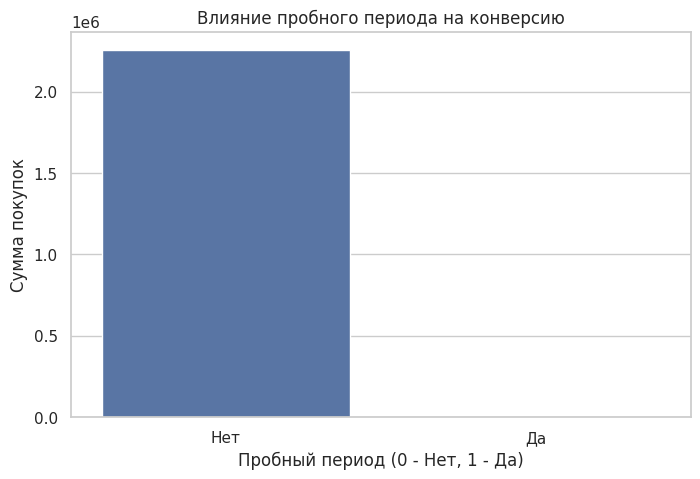

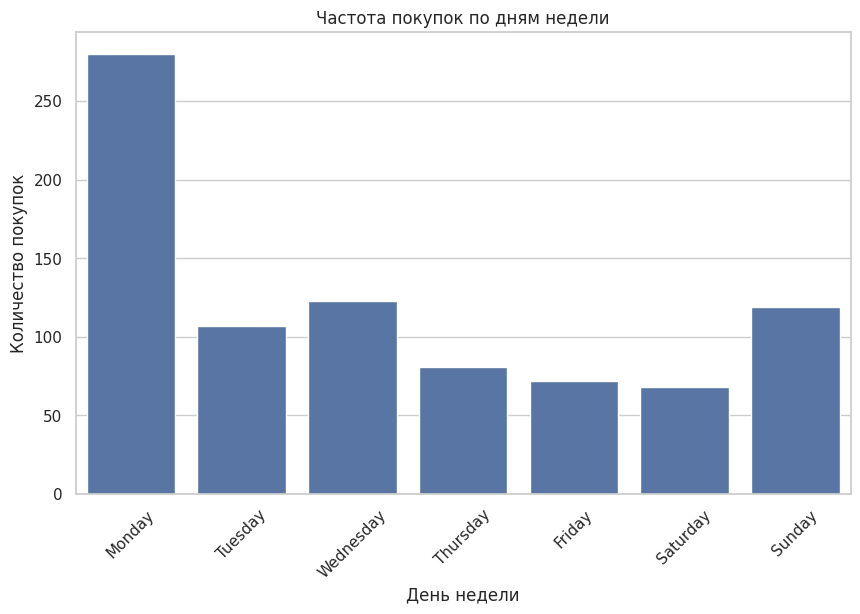

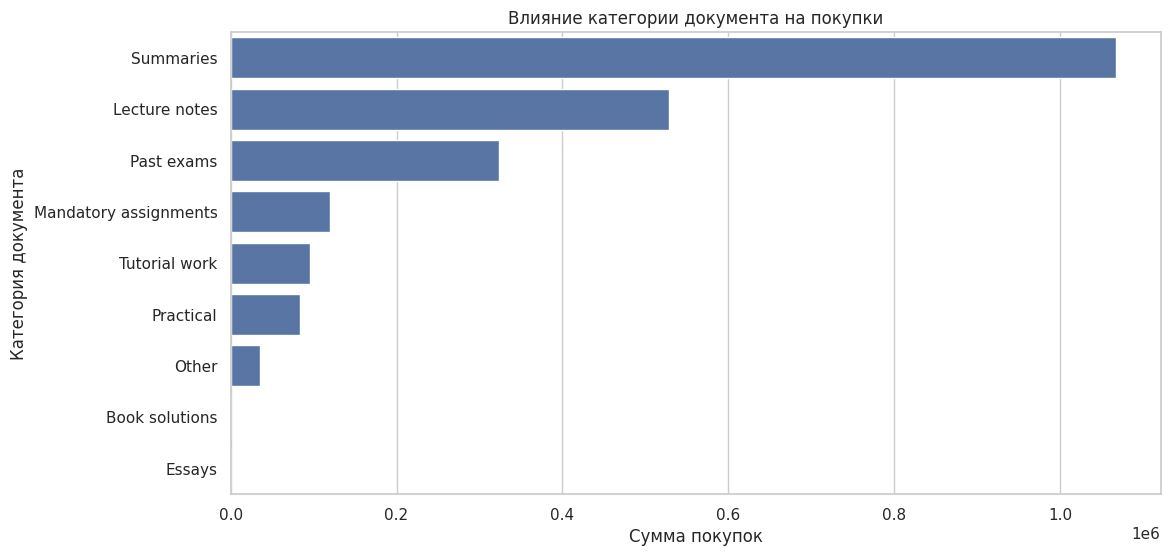

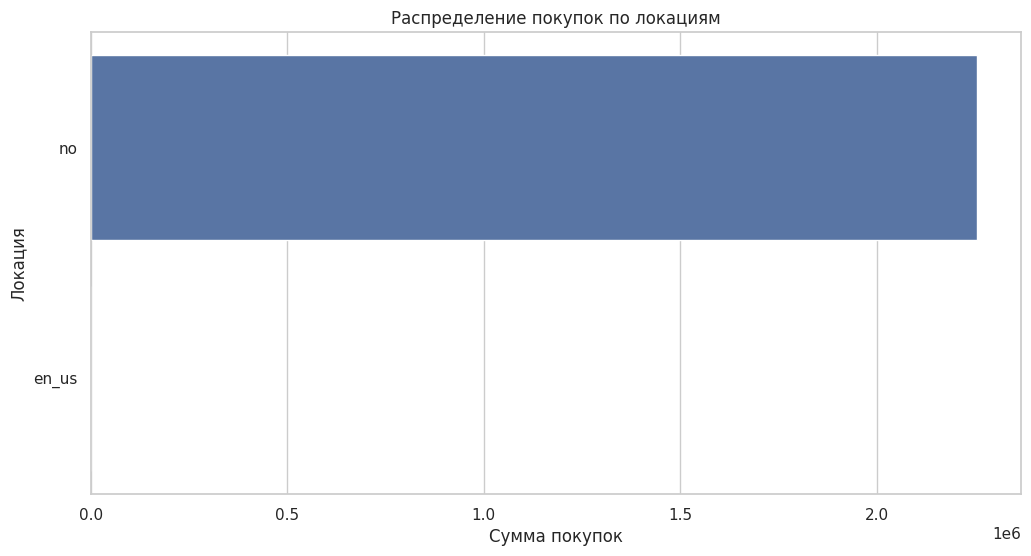

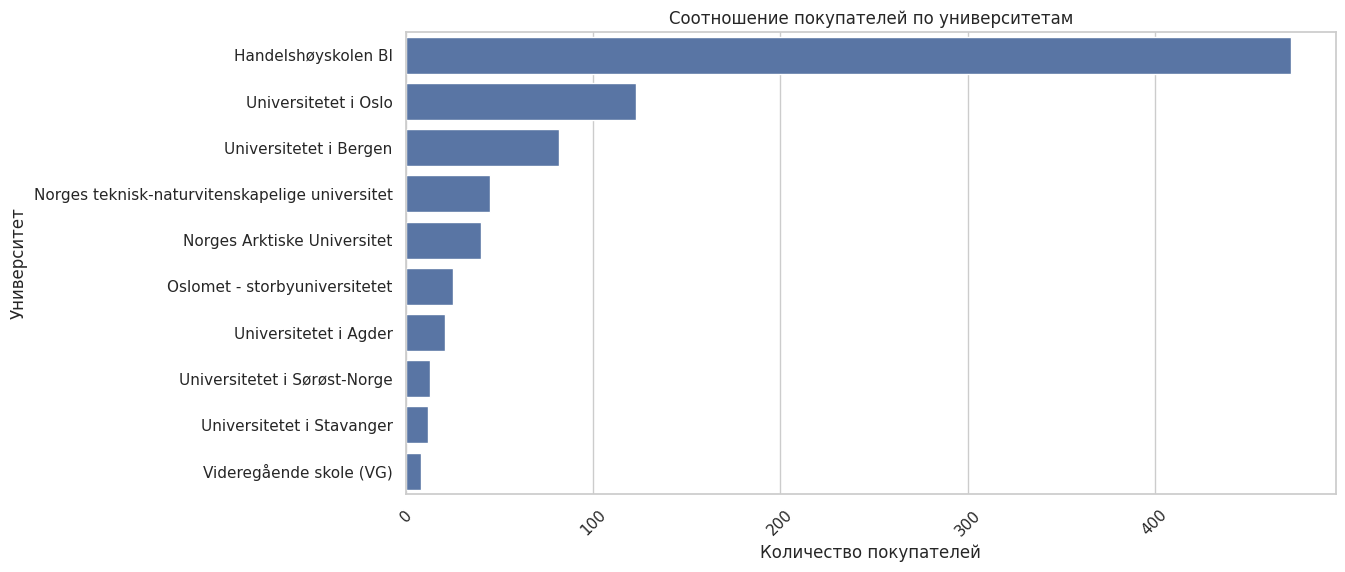

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Влияние пробного периода на конверсию
if 'isTrial' in combined_data.columns and 'amount' in combined_data.columns:
    trial_conversion = combined_data.groupby('isTrial')['amount'].sum().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(x='isTrial', y='amount', data=trial_conversion)
    plt.title('Влияние пробного периода на конверсию')
    plt.xlabel('Пробный период (0 - Нет, 1 - Да)')
    plt.ylabel('Сумма покупок')
    plt.xticks([0, 1], ['Нет', 'Да'])
    plt.show()

# 2. Частота покупок по времени (день недели)
if 'createdAt' in combined_data.columns and 'amount' in combined_data.columns:
    combined_data['dayOfWeek'] = combined_data['createdAt'].dt.day_name()
    purchase_frequency = combined_data.groupby('dayOfWeek')['amount'].count().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ).reset_index()
    purchase_frequency.columns = ['dayOfWeek', 'purchaseCount']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='dayOfWeek', y='purchaseCount', data=purchase_frequency)
    plt.title('Частота покупок по дням недели')
    plt.xlabel('День недели')
    plt.ylabel('Количество покупок')
    plt.xticks(rotation=45)
    plt.show()

# 3. Влияние категории документа на покупки
if 'categoryName' in combined_data.columns and 'amount' in combined_data.columns:
    category_impact = combined_data.groupby('categoryName')['amount'].sum().sort_values(ascending=False).reset_index()
    category_impact.columns = ['categoryName', 'totalAmount']
    plt.figure(figsize=(12, 6))
    sns.barplot(x='totalAmount', y='categoryName', data=category_impact)
    plt.title('Влияние категории документа на покупки')
    plt.xlabel('Сумма покупок')
    plt.ylabel('Категория документа')
    plt.show()

# 4. Распределение покупок по локациям
if 'shopperLocale' in combined_data.columns and 'amount' in combined_data.columns:
    location_counts = combined_data.groupby('shopperLocale')['amount'].sum().sort_values(ascending=False).reset_index()
    location_counts.columns = ['shopperLocale', 'totalAmount']
    plt.figure(figsize=(12, 6))
    sns.barplot(x='totalAmount', y='shopperLocale', data=location_counts)
    plt.title('Распределение покупок по локациям')
    plt.xlabel('Сумма покупок')
    plt.ylabel('Локация')
    plt.show()

# 5. Соотношение покупателей по университетам
if 'universityName' in combined_data.columns:
    university_counts = combined_data['universityName'].value_counts().head(10).reset_index()
    university_counts.columns = ['universityName', 'count']
    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='universityName', data=university_counts)
    plt.title('Соотношение покупателей по университетам')
    plt.xlabel('Количество покупателей')
    plt.ylabel('Университет')
    plt.xticks(rotation=45)
    plt.show()


# 10. Вывод файла на выгрузку

In [13]:
# 1. Анонимизация паспортных данных
if 'passportNumber' in combined_data.columns or 'passport number' in combined_data.columns:
    passport_col = 'passportNumber' if 'passportNumber' in combined_data.columns else 'passport number'
    combined_data[passport_col] = combined_data[passport_col].apply(
        lambda x: 'x' * len(str(x)) if pd.notnull(x) else x
    )

# 2. Удаление столбца 'lastName'
if 'lastName' in combined_data.columns:
    combined_data = combined_data.drop(columns=['lastName'])

# 3. Восстановление пропусков в 'categoryName' на основе 'categoryId'
if 'categoryName' in combined_data.columns and 'categoryId' in combined_data.columns:
    category_id_to_name = combined_data[['categoryId', 'categoryName']].dropna().drop_duplicates().set_index('categoryId')['categoryName'].to_dict()
    combined_data['categoryName'] = combined_data.apply(
        lambda row: row['categoryName'] if pd.notnull(row['categoryName']) else category_id_to_name.get(row['categoryId'], 'Unknown'),
        axis=1
    )

# 4. Удаление строк с пропусками в критически важных полях, таких как 'userId'
user_id_col = [col for col in combined_data.columns if 'user' in col.lower() and 'id' in col.lower()]
if user_id_col:
    combined_data = combined_data.dropna(subset=user_id_col)

# 5. Сохранение обработанного файла
output_path = '/content/combined_data_processed.xlsx'
combined_data.to_excel(output_path, index=False)

print(f"Файл успешно сохранен по пути: {output_path}")


Файл успешно сохранен по пути: /content/combined_data_processed.xlsx
